La combinaison de classifieurs indépendant transforme l'ensemble d'apprentissage initial  $Z = \{(\mathbf x_i,y_i), i\in[\![1,n]\!],\mathbf x_i\in X,y_i\in \{-1, 1\}\}$ en plusieurs ensembles, disjoints ou non, sur lesquels plusieurs classifieurs indépendants sont entraînés. Une méthode de combinaison est ensuite appliquée pour produire la classification finale. 

# Bootstraping et bagging

## Bootstrapping
Le bootstrapping est une méthode d'échantillonnage statistique dans laquelle $M$ ensembles d'entraînement non disjoints sont définis en tirant aléatoirement et avec remise dans $Z$. Après $n$ tirages (pour $n$ grand), la probabilité qu'un exemple n'ait pas encore été sélectionnée est 

$$\left(1-\frac{1}{n}\right)^n\approx e^{-1}$$

et chaque ensemble d'apprentissage contient donc $(1-e^{-1})\approx 63.2\%$ des exemples. 

Le bootstrapping ({prf:ref}`bootstrap-algorithm`) est utilisé pour inférer une statistique $S$ sur une population $\mathcal{P}$, à partir d'un échantillon de $n$ individus de $\mathcal{P}$. $M$ tirages avec remise de $n$ éléments sont effectués sur $Z$, permettant d'estimer $M$ valeurs de $S$. Une moyenne permet ensuite d'obtenir l'estimation finale de la statistique $S$, et d'obtenir une estimation de la variance et des intervalles de confiance.


```{prf:algorithm} 
:label: bootstrap-algorithm
**Entrée** : l'ensemble d'apprentissage $Z$, $\mathbf x\in X$, $M$

**Sortie** : Une estimation $\hat{S}$ de la statistique $S$


Pour $i= 1$ à $M$

  1. Tirer avec remise dans $Z$ n exemples $Z_i$ $\rightarrow$ ensemble $Z_i$
  2. Calculer une estimation $\hat{S}_i$ de $S$ sur $Z_i$

Calculer $\hat{S}=\frac{1}{M}\displaystyle\sum_{i=1}^M \hat{S}_i$

Calculer une estimation de la précision de $\hat{S}$ (e.g. variance des $\hat{S}_i$)
```



## Bagging
Le bagging (bootstrap aggregation) utilise le bootstrapping pour réduire la variance et/ou pour améliorer la précision d'un prédicteur donné. Si $z_i=(\mathbf x_i,y_i),i\in[\![1,n]\!]$, avec $y_i$ la classe de $\mathbf x_i$ (classification) ou une valeur de $\mathbb{R}^k$ (régression), le bagging apprend un ensemble de $M$ prédicteurs (obtenus par $M$ bootstrapping sur $Z$), et calcule un prédicteur final en combinant les prédicteurs appris. Cette combinaison réduit la variance de l'estimation de la sortie, d'autant plus que $M$ est grand. 

A noter que d'autres stratégies de bagging existent, qui n'utilisent pas le bootstrapping :

- lorsque les ensembles d'entraînement sont construits sans remise, on parle de Pasting
- lorsque les ensembles d'entraînement sont construits à partir d'un sous-ensemble des composantes des vecteurs $\mathbf x\in\mathbb{R}^d$, on parle de random subspaces
- lorsque chaque classifieur est entraîné sur $Z$, et  chaque instance se voir affecter un poids aléatoire, on parle de wagging.


Le code suivant implémente la classification d'un jeu de données non séparable par bagging de 500 arbres de décision.

Précision sur l'ensemble de test 0.9028571428571428


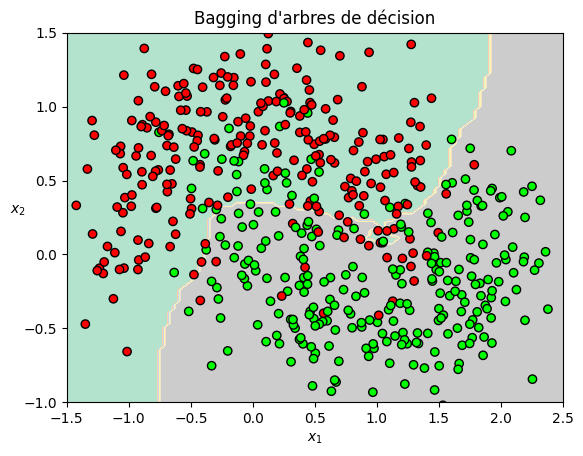

In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    mapp = ListedColormap(['#FF0000', '#00FF00'])
    plt.contourf(x1, x2, y_pred, alpha=1, cmap='Pastel2')
    if contour:
        plt.contour(x1, x2, y_pred, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=mapp,edgecolors='k')
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=700, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

print("Précision sur l'ensemble de test", np.sum(bag_clf.predict(X_test) == y_test) / len(y_test))


plot_decision_boundary(bag_clf, X_train, y_train,contour=False)
plt.title("Bagging d'arbres de décision");